In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mengatur style plot
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Monitoring dan Optimasi untuk Dataset Besar
import psutil
import gc
from datetime import datetime

def get_memory_usage():
    """Fungsi untuk mengecek penggunaan memori"""
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / 1024 / 1024  # Convert to MB

def print_memory_usage(step_name):
    """Print penggunaan memori dengan timestamp"""
    memory_mb = get_memory_usage()
    timestamp = datetime.now().strftime("%H:%M:%S")
    print(f"[{timestamp}] {step_name}: {memory_mb:.2f} MB")

print("=" * 80)
print("SETUP UNTUK ANALISIS DATASET BESAR")
print("=" * 80)
print_memory_usage("Initial memory usage")

SETUP UNTUK ANALISIS DATASET BESAR
[18:10:40] Initial memory usage: 177.73 MB


In [3]:
# IV.1.1 Eksplorasi Data - Exploratory Data Analysis (EDA)
print("=" * 80)
print("IV.1.1 EKSPLORASI DATA - EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

# Membaca seluruh dataset tanpa batasan baris
print("Loading complete dataset...")
df = pd.read_csv('rba-dataset.csv')
print(f"Dataset loaded successfully with {len(df):,} records")

# Mengubah nilai "-" menjadi NaN
print("Converting '-' values to NaN...")
df.replace("-", np.nan, inplace=True)

# Menampilkan informasi ukuran dataset
print(f"Using complete dataset with {df.shape[0]:,} rows and {df.shape[1]:,} columns")

# A. Karakteristik Dataset
print("\nA. KARAKTERISTIK DATASET")
print("-" * 50)

# Deskripsi singkat dataset (jumlah fitur, observasi, tipe data)
print("1. Deskripsi Singkat Dataset:")
print(f"   - Jumlah observasi (baris): {df.shape[0]:,}")
print(f"   - Jumlah fitur (kolom): {df.shape[1]:,}")
print("\n   Tipe data setiap kolom:")
for col, dtype in df.dtypes.items():
    print(f"   - {col}: {dtype}")

# Tampilkan 5 baris pertama
print("\n2. Tampilan 5 Baris Pertama Data:")
display(df.head())

# Identifikasi fitur utama
print("\n3. Identifikasi Fitur Utama:")
for col in df.columns:
    print(f"   - {col}")

# Distribusi statistik dasar untuk kolom numerik
print("\n4. Distribusi Statistik Dasar (untuk fitur numerik):")
numeric_stats = df.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats['unique'] = df.select_dtypes(include=[np.number]).nunique()
display(numeric_stats)

# Distribusi statistik dasar untuk kolom kategorikal
print("\n5. Distribusi Statistik Dasar (untuk fitur kategorikal):")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n   {col}:")
    value_counts = df[col].value_counts().head(5)
    total_values = len(df[col])
    print("   Top 5 nilai:")
    for value, count in value_counts.items():
        print(f"     - {value}: {count:,} ({count/total_values*100:.2f}%)")
    print(f"   Total nilai unik: {df[col].nunique():,}")

IV.1.1 EKSPLORASI DATA - EXPLORATORY DATA ANALYSIS (EDA)
Loading complete dataset...
Dataset loaded successfully with 31,269,264 records
Converting '-' values to NaN...
Dataset loaded successfully with 31,269,264 records
Converting '-' values to NaN...
Using complete dataset with 31,269,264 rows and 16 columns

A. KARAKTERISTIK DATASET
--------------------------------------------------
1. Deskripsi Singkat Dataset:
   - Jumlah observasi (baris): 31,269,264
   - Jumlah fitur (kolom): 16

   Tipe data setiap kolom:
   - index: int64
   - Login Timestamp: object
   - User ID: int64
   - Round-Trip Time [ms]: float64
   - IP Address: object
   - Country: object
   - Region: object
   - City: object
   - ASN: int64
   - User Agent String: object
   - Browser Name and Version: object
   - OS Name and Version: object
   - Device Type: object
   - Login Successful: bool
   - Is Attack IP: bool
   - Is Account Takeover: bool

2. Tampilan 5 Baris Pertama Data:
Using complete dataset with 31,269,

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,NaN,NaN,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,NaN,NaN,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,NaN,NaN,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False



3. Identifikasi Fitur Utama:
   - index
   - Login Timestamp
   - User ID
   - Round-Trip Time [ms]
   - IP Address
   - Country
   - Region
   - City
   - ASN
   - User Agent String
   - Browser Name and Version
   - OS Name and Version
   - Device Type
   - Login Successful
   - Is Attack IP
   - Is Account Takeover

4. Distribusi Statistik Dasar (untuk fitur numerik):


,count,mean,std,min,25%,50%,75%,max,range,unique
index,31269264.0,1.563463e+07,9.026659e+06,0.000000e+00,7.817316e+06,1.563463e+07,2.345195e+07,3.126926e+07,3.126926e+07,31269264
User ID,31269264.0,-1.924043e+18,4.514276e+18,-9.223371e+18,-4.324476e+18,-4.324476e+18,9.119813e+17,9.223359e+18,1.844673e+19,4304857
Round-Trip Time [ms],1275935.0,6.639332e+02,1.116125e+03,8.000000e+00,4.710000e+02,5.380000e+02,6.770000e+02,2.234570e+05,2.234490e+05,9113
ASN,31269264.0,1.621215e+05,1.719185e+05,1.200000e+01,2.969500e+04,4.116400e+04,3.933980e+05,5.077270e+05,5.077150e+05,12955



5. Distribusi Statistik Dasar (untuk fitur kategorikal):

   Login Timestamp:

   Login Timestamp:
   Top 5 nilai:
     - 2020-10-31 16:22:56.302: 2 (0.00%)
     - 2020-05-28 20:08:16.308: 2 (0.00%)
     - 2020-08-21 12:18:26.777: 2 (0.00%)
     - 2020-06-15 11:48:49.279: 2 (0.00%)
     - 2020-02-09 16:29:45.175: 2 (0.00%)
   Top 5 nilai:
     - 2020-10-31 16:22:56.302: 2 (0.00%)
     - 2020-05-28 20:08:16.308: 2 (0.00%)
     - 2020-08-21 12:18:26.777: 2 (0.00%)
     - 2020-06-15 11:48:49.279: 2 (0.00%)
     - 2020-02-09 16:29:45.175: 2 (0.00%)
   Total nilai unik: 31,269,085

   IP Address:
   Total nilai unik: 31,269,085

   IP Address:
   Top 5 nilai:
     - 10.3.205.197: 444,433 (1.42%)
     - 23.137.225.33: 321,325 (1.03%)
     - 10.3.205.196: 257,343 (0.82%)
     - 10.3.205.195: 236,902 (0.76%)
     - 10.3.205.194: 178,138 (0.57%)
   Top 5 nilai:
     - 10.3.205.197: 444,433 (1.42%)
     - 23.137.225.33: 321,325 (1.03%)
     - 10.3.205.196: 257,343 (0.82%)
     - 10.3.205.195: 2


B. POTENSI MASALAH DATA
--------------------------------------------------
[18:30:06] Starting data quality analysis: 2920.24 MB
Checking for duplicates...
1. Data Duplikat: 0 baris (0.00% dari total data)
1. Data Duplikat: 0 baris (0.00% dari total data)


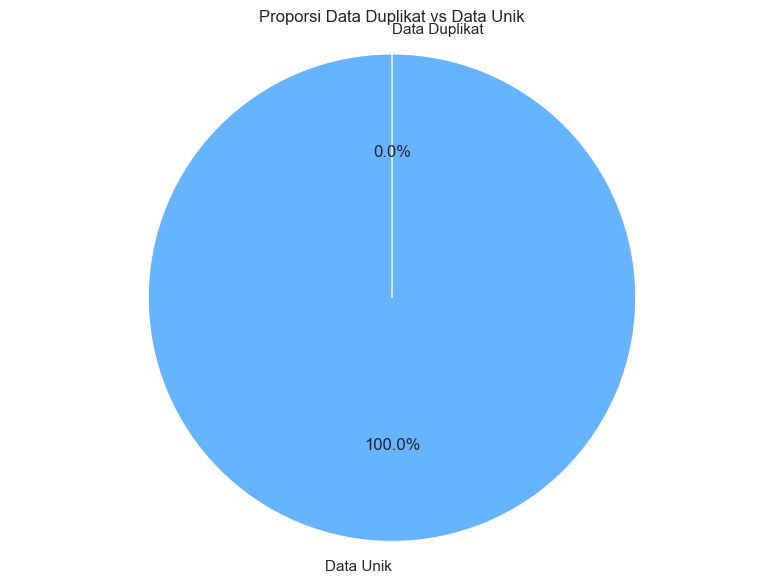


Checking for missing values...

2. Missing Values (Nilai Hilang):

2. Missing Values (Nilai Hilang):


,Jumlah Nilai Hilang,Persentase (%)
Round-Trip Time [ms],29993329,95.919523
Region,14060790,44.966808
City,13913142,44.494626
Device Type,1526,0.004880


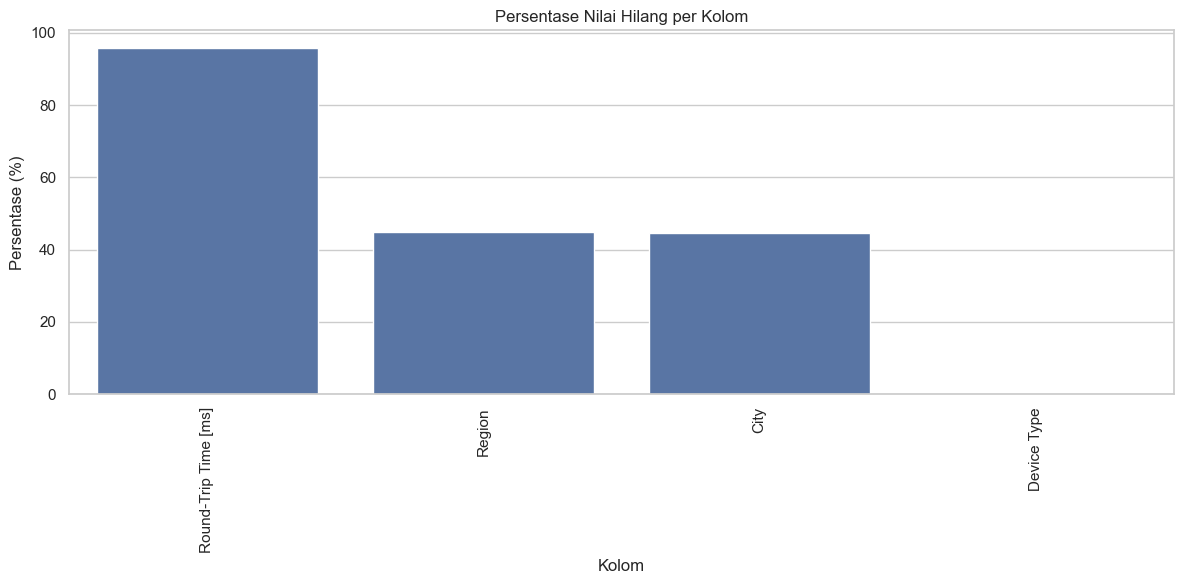

[18:33:02] After missing values analysis: 6791.52 MB

3. Outliers (Data Pencilan):
   Menggunakan sample 50,000 data untuk visualisasi outliers
   Menggunakan sample 50,000 data untuk visualisasi outliers
   - index: 0 outliers (0.00% dari total data)
   - index: 0 outliers (0.00% dari total data)


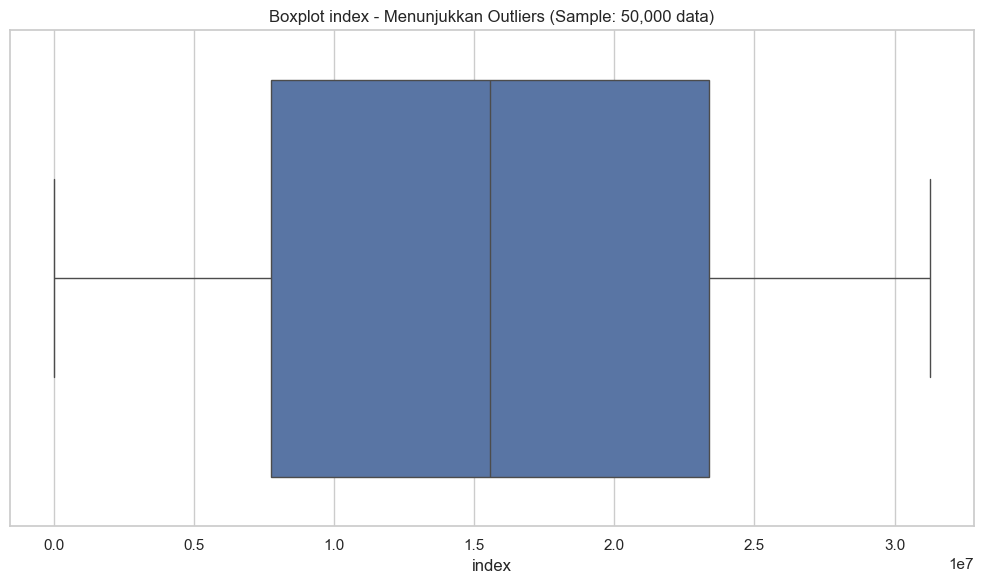

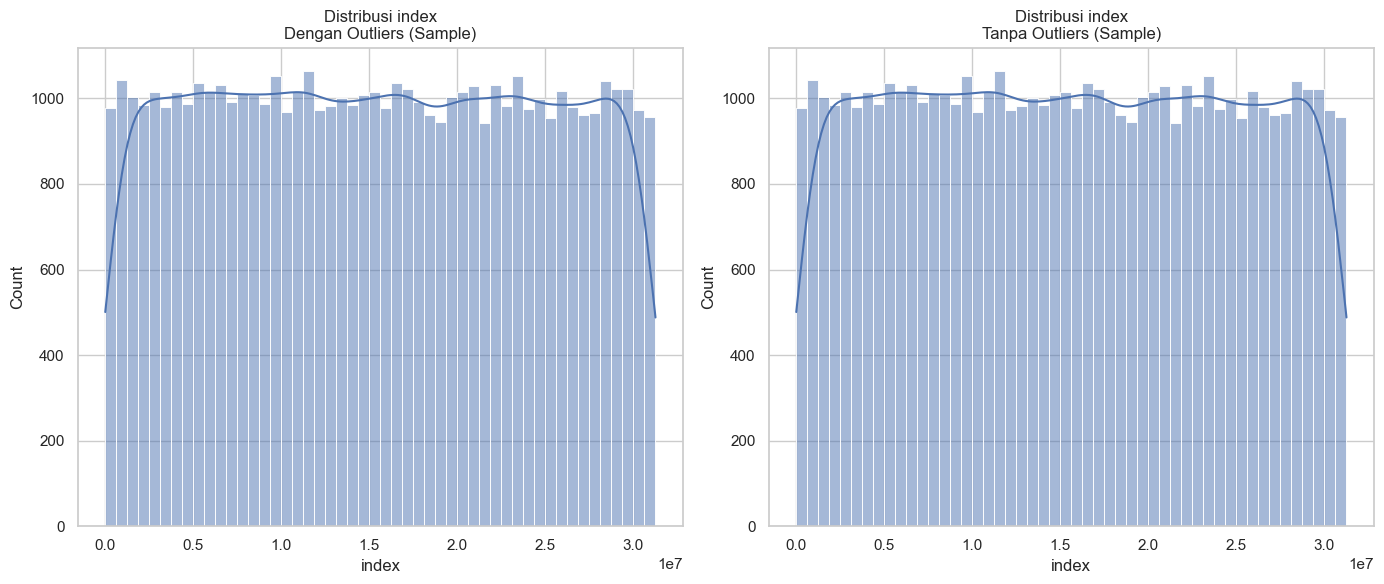

   - User ID: 424,681 outliers (1.36% dari total data)


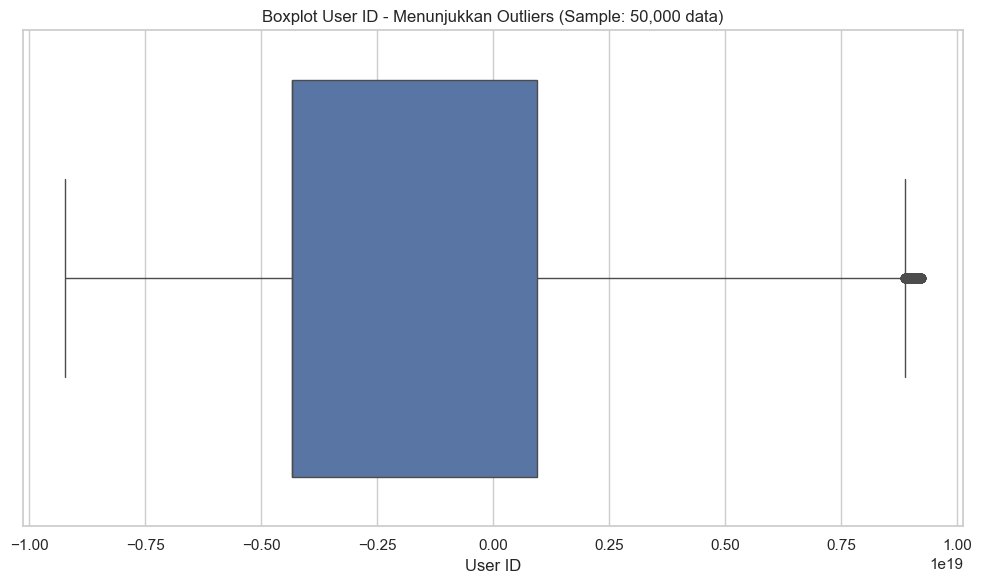

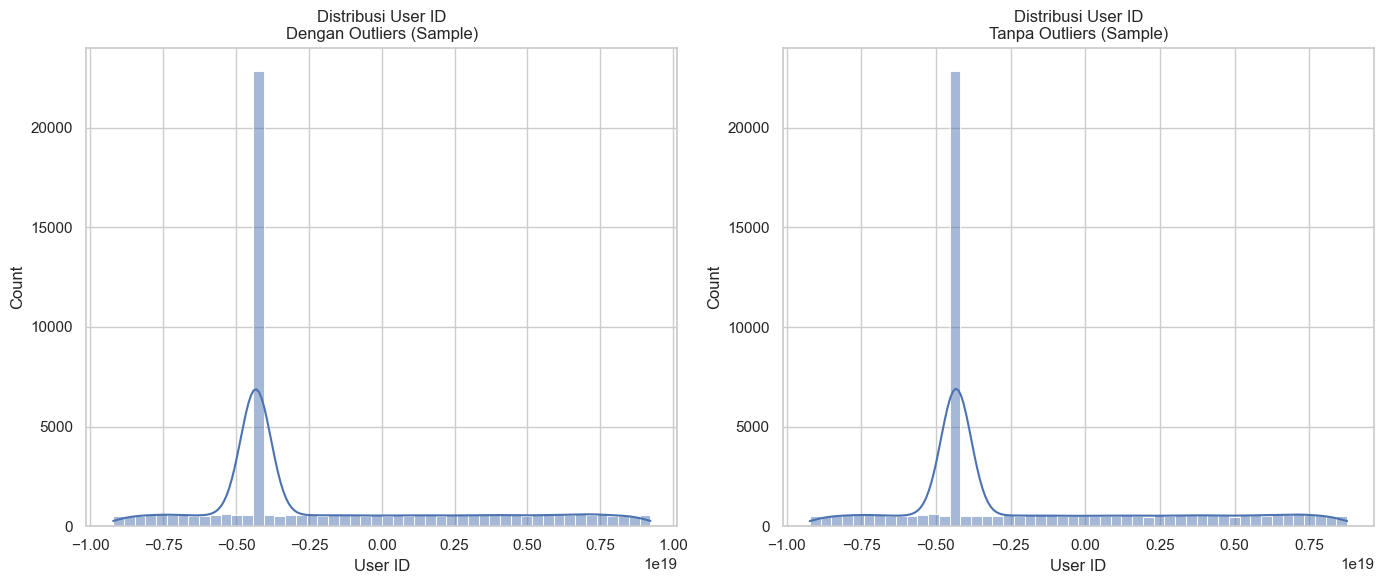

   - Round-Trip Time [ms]: 198,486 outliers (0.63% dari total data)


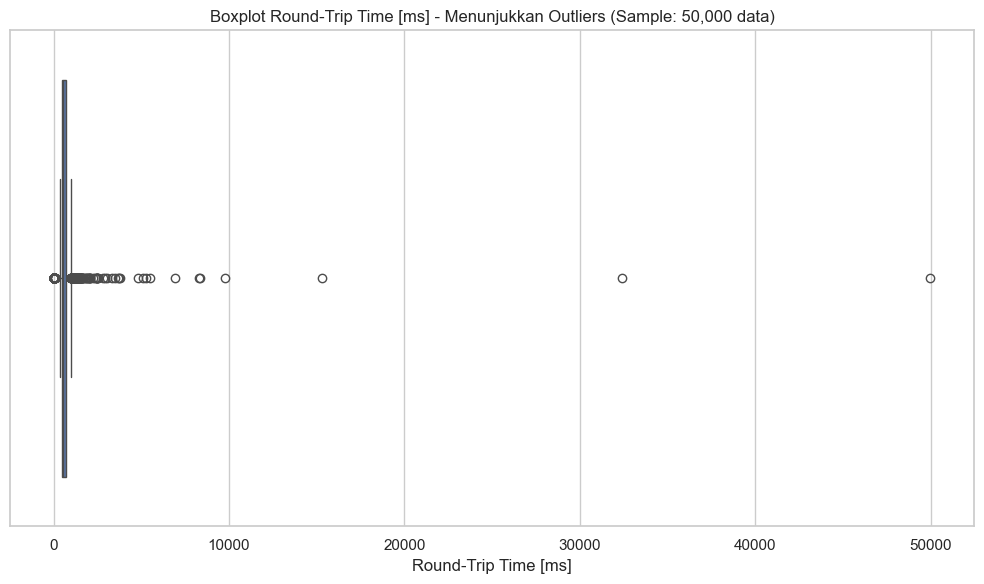

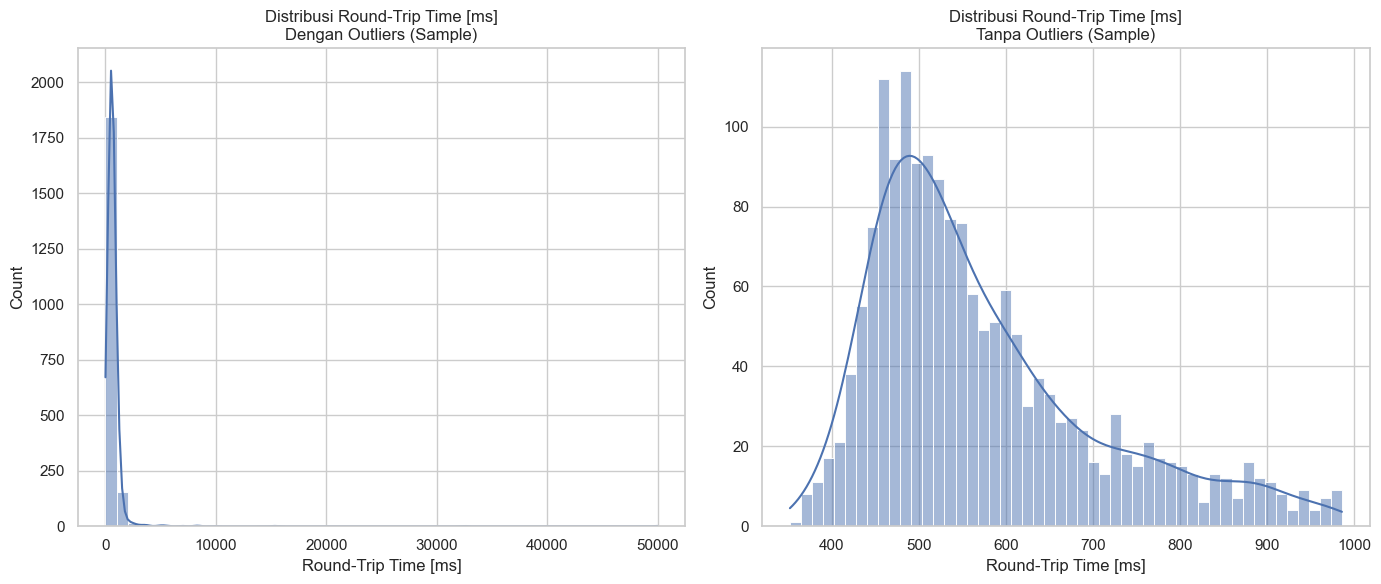

   - ASN: 0 outliers (0.00% dari total data)


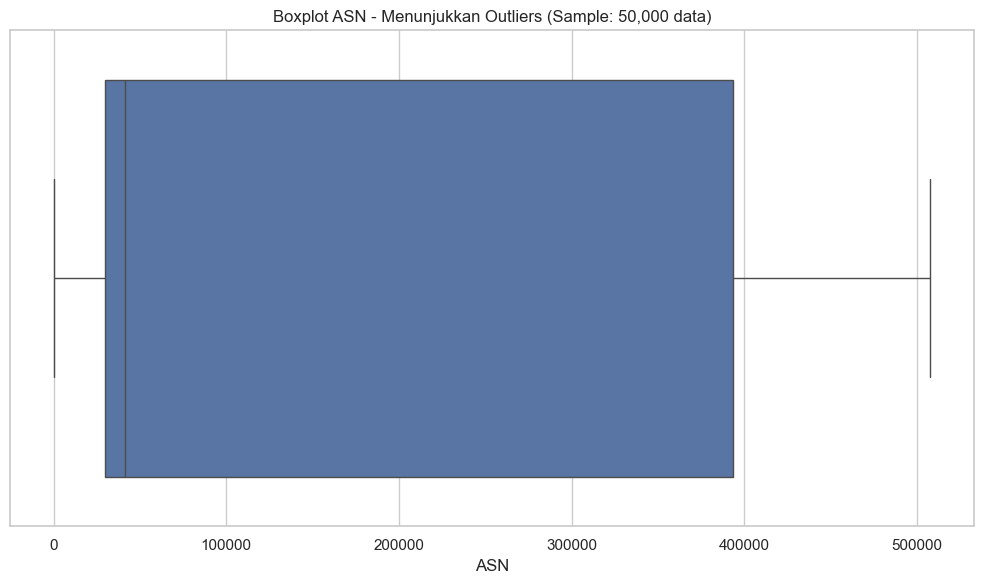

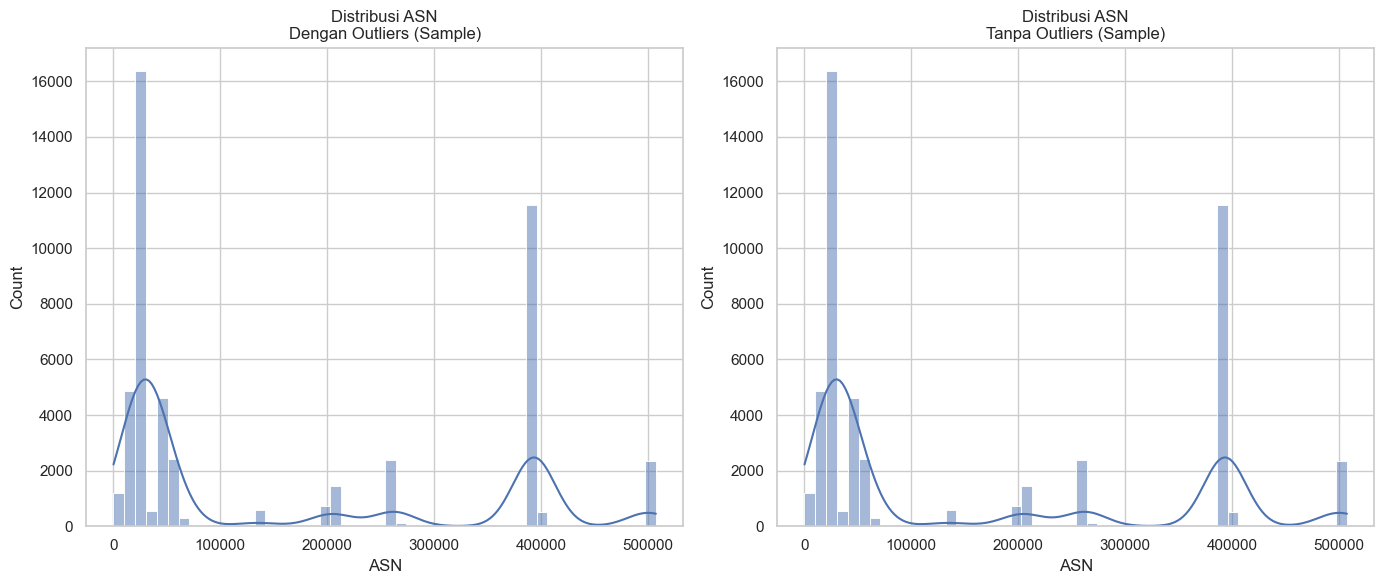

[18:33:23] After outliers analysis: 6648.84 MB

4. Ketidakseimbangan Kelas (Imbalanced Data):
   Distribusi kelas target 'Is Account Takeover':
   - False: 31,269,123 (100.00%)
   - True: 141 (0.00%)


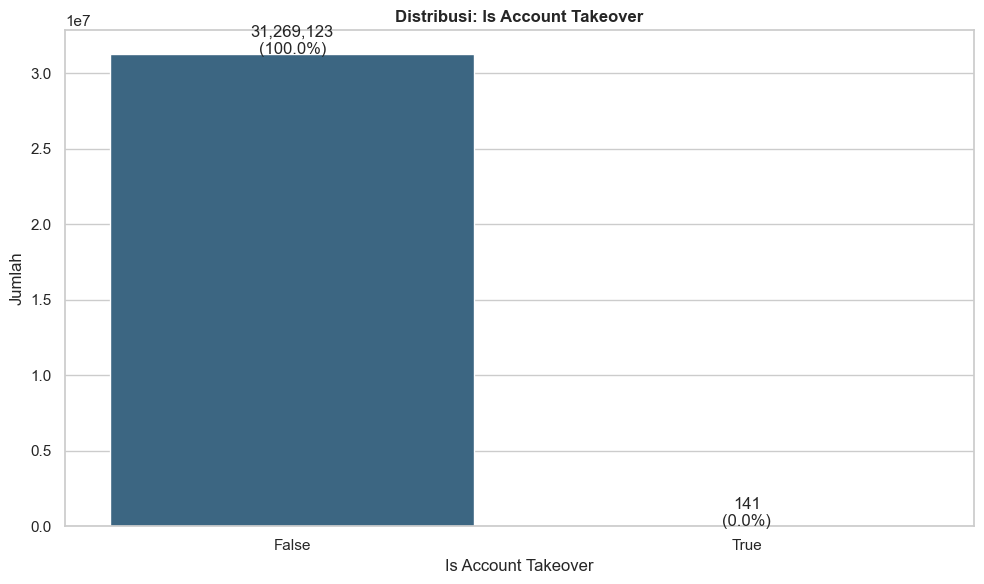

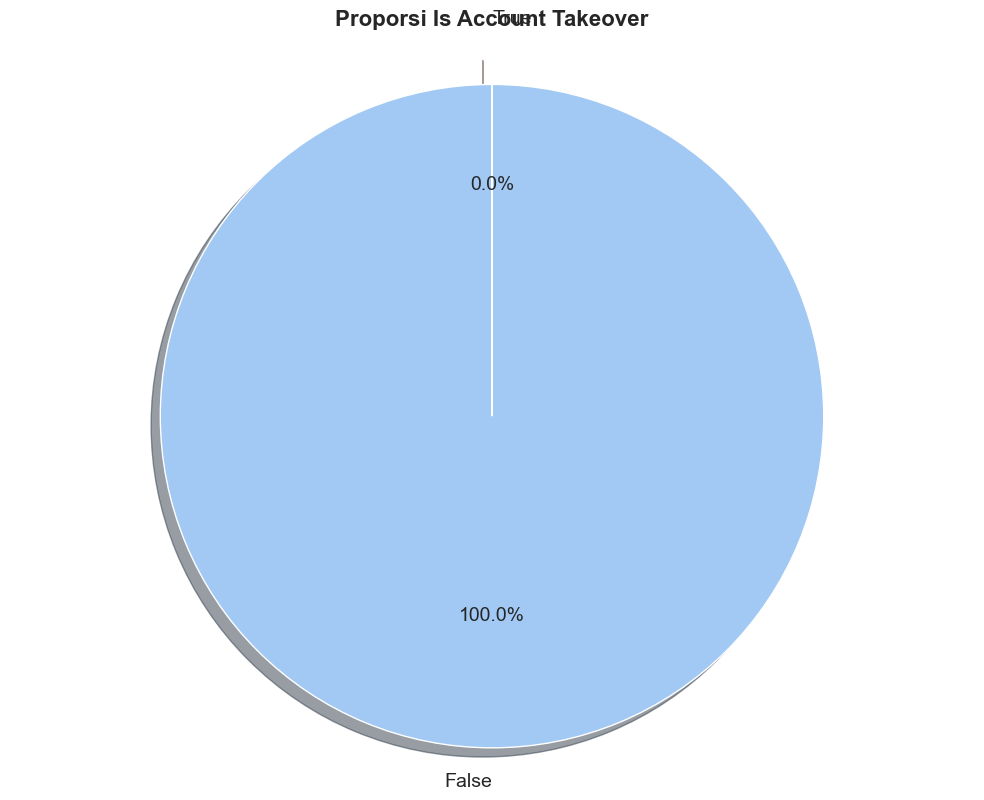

[18:34:10] After class imbalance analysis: 2776.25 MB

5. Visualisasi User ID:


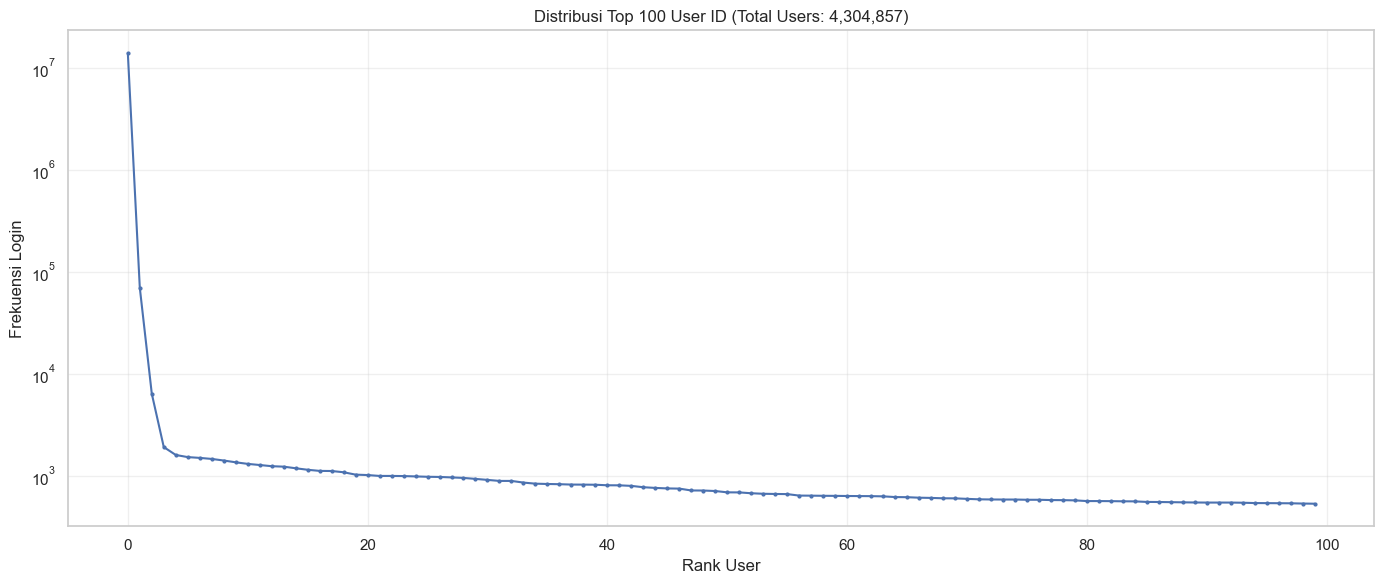

   Total unique users: 4,304,857
   User dengan login terbanyak: 14,025,899 login
   User dengan login tersedikit: 1 login
[18:34:18] Completed data quality analysis: 1559.40 MB


In [4]:
# B. Potensi Masalah Data
print("\nB. POTENSI MASALAH DATA")
print("-" * 50)
print_memory_usage("Starting data quality analysis")

# 1. Kehadiran data duplikat
print("Checking for duplicates...")
duplicates = df.duplicated().sum()
print(f"1. Data Duplikat: {duplicates:,} baris ({duplicates/len(df)*100:.2f}% dari total data)")

# Visualisasi data duplikat
plt.figure(figsize=(8, 6))
labels = ['Data Unik', 'Data Duplikat']
counts = [len(df) - duplicates, duplicates]
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Proporsi Data Duplikat vs Data Unik')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Missing values atau data hilang
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah Nilai Hilang': missing_values,
    'Persentase (%)': missing_percent
})

print("\n2. Missing Values (Nilai Hilang):")
missing_summary = missing_df[missing_df['Jumlah Nilai Hilang'] > 0].sort_values('Jumlah Nilai Hilang', ascending=False)
if not missing_summary.empty:
    display(missing_summary)
else:
    print("   Tidak ada missing values dalam dataset.")

# Visualisasi missing values (hanya jika ada missing values)
if not missing_summary.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_summary.index, y='Persentase (%)', data=missing_summary)
    plt.title('Persentase Nilai Hilang per Kolom')
    plt.xticks(rotation=90)
    plt.ylabel('Persentase (%)')
    plt.xlabel('Kolom')
    plt.tight_layout()
    plt.show()

print_memory_usage("After missing values analysis")

# 3. Outliers atau data pencilan (untuk fitur numerik)
print("\n3. Outliers (Data Pencilan):")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Untuk dataset besar, gunakan sample untuk visualisasi
SAMPLE_SIZE = min(50000, len(df))  # Maksimal 50k untuk visualisasi
df_viz_sample = df.sample(n=SAMPLE_SIZE, random_state=42) if len(df) > SAMPLE_SIZE else df

print(f"   Menggunakan sample {len(df_viz_sample):,} data untuk visualisasi outliers")

# Untuk setiap kolom numerik, hitung outliers menggunakan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"   - {col}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}% dari total data)")
    
    # Visualisasi boxplot untuk menunjukkan outliers (menggunakan sample)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_viz_sample[col])
    plt.title(f'Boxplot {col} - Menunjukkan Outliers (Sample: {len(df_viz_sample):,} data)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
    # Distribusi dengan dan tanpa outliers (menggunakan sample)
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Distribusi dengan outliers
    plt.subplot(1, 2, 1)
    sns.histplot(df_viz_sample[col], kde=True, bins=50)
    plt.title(f'Distribusi {col}\nDengan Outliers (Sample)')
    plt.xlabel(col)
    
    # Plot 2: Distribusi tanpa outliers
    plt.subplot(1, 2, 2)
    clean_data = df_viz_sample[(df_viz_sample[col] >= lower_bound) & (df_viz_sample[col] <= upper_bound)][col]
    sns.histplot(clean_data, kde=True, bins=50)
    plt.title(f'Distribusi {col}\nTanpa Outliers (Sample)')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

print_memory_usage("After outliers analysis")

# 4. Ketidakseimbangan kelas (imbalanced data)
print("\n4. Ketidakseimbangan Kelas (Imbalanced Data):")

# Kolom target adalah 'Is Account Takeover'
target_col = 'Is Account Takeover'
if target_col in df.columns:
    class_counts = df[target_col].value_counts()
    print(f"   Distribusi kelas target '{target_col}':")
    for cls, count in class_counts.items():
        print(f"   - {cls}: {count:,} ({count/len(df)*100:.2f}%)")
    
    # Visualisasi ketidakseimbangan kelas
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=target_col, data=df, palette='viridis')
    plt.title(f'Distribusi: {target_col}', fontweight='bold')
    plt.xlabel(target_col)
    plt.ylabel('Jumlah')
    
    # Tambahkan label jumlah di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1, f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha="center", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Visualisasi ketidakseimbangan dengan pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
           colors=sns.color_palette('pastel', len(class_counts)), startangle=90, 
           explode=[0.05] * len(class_counts), shadow=True, textprops={'fontsize': 14})
    plt.title(f'Proporsi {target_col}', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print(f"   Kolom '{target_col}' tidak ditemukan dalam dataset.")

print_memory_usage("After class imbalance analysis")

# Clean up sample data
del df_viz_sample
gc.collect()

# 5. Visualisasi User ID dengan optimasi untuk dataset besar
print("\n5. Visualisasi User ID:")
if 'User ID' in df.columns:
    # Untuk dataset besar, gunakan value_counts dan plot top users saja
    user_counts = df['User ID'].value_counts()
    top_users = user_counts.head(100)  # Top 100 users saja
    
    plt.figure(figsize=(14, 6))
    plt.plot(range(len(top_users)), top_users.values, marker='o', markersize=2)
    plt.title(f'Distribusi Top 100 User ID (Total Users: {len(user_counts):,})')
    plt.xlabel('Rank User')
    plt.ylabel('Frekuensi Login')
    plt.yscale('log')  # Log scale untuk better visibility
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"   Total unique users: {len(user_counts):,}")
    print(f"   User dengan login terbanyak: {user_counts.iloc[0]:,} login")
    print(f"   User dengan login tersedikit: {user_counts.iloc[-1]:,} login")
else:
    print("   Kolom 'User ID' tidak ditemukan dalam dataset.")

print_memory_usage("Completed data quality analysis")

In [ ]:
# Ringkasan Eksplorasi Data
print("\nRINGKASAN EKSPLORASI DATA")
print("=" * 80)

# Hitung duplicates untuk dataset lengkap
duplicates = df.duplicated().sum()

# Hitung missing values untuk dataset lengkap
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Jumlah Nilai Hilang': missing_values,
    'Persentase (%)': (missing_values / len(df)) * 100
})

# Cek kolom target
target_col = 'Is Account Takeover'
if target_col in df.columns:
    target_distribution = df[target_col].value_counts(normalize=True) * 100
    attack_pct = target_distribution[True] if True in target_distribution.index else 0
    normal_pct = target_distribution[False] if False in target_distribution.index else 100
else:
    attack_pct = 0
    normal_pct = 100

print(f"""
Dataset lengkap ini terdiri dari {df.shape[0]:,} observasi dan {df.shape[1]:,} fitur.

A. Karakteristik Dataset:
   - Dataset berisi informasi login lengkap yang mencakup IP Address, lokasi geografis (Country, Region, City), 
     informasi perangkat (User Agent, OS, Browser, Device Type), serta indikator keberhasilan dan serangan.
   - Fitur target 'Is Account Takeover' menunjukkan apakah login merupakan upaya pengambilalihan akun.
   - Data numerik seperti 'ASN', 'Round-Trip Time [ms]' memiliki distribusi dengan rentang nilai yang bervariasi.
   - Mayoritas data berasal dari negara dan kota tertentu, yang mencerminkan pola penggunaan platform secara global.
   - Dengan menggunakan dataset lengkap, analisis menjadi lebih komprehensif dan representatif.

B. Potensi Masalah Data:
   - Duplikasi data: {'Terdeteksi ' + str(duplicates) + ' data duplikat (' + str(round(duplicates/len(df)*100, 2)) + '%)' if duplicates > 0 else 'Tidak ada data duplikat'}.
   - Missing values: {'Terdeteksi nilai hilang pada beberapa kolom' if not missing_df[missing_df['Jumlah Nilai Hilang'] > 0].empty else 'Tidak ada nilai hilang'}.
   - Outliers: Terdapat outliers pada beberapa fitur numerik, terutama pada 'Round-Trip Time [ms]' dan 'ASN'.
   - Ketidakseimbangan kelas: Data target 'Is Account Takeover' menunjukkan ketidakseimbangan dengan distribusi {attack_pct:.2f}% serangan dan {normal_pct:.2f}% bukan serangan.
   - Skala data: Dengan dataset lengkap ({df.shape[0]:,} records), analisis statistik dan visualisasi menjadi lebih akurat dan dapat diandalkan.

C. Keuntungan Menggunakan Dataset Lengkap:
   - Representasi yang lebih akurat dari pola serangan dan aktivitas normal
   - Distribusi fitur yang lebih komprehensif dan tidak bias
   - Kemampuan deteksi outliers dan anomali yang lebih baik
   - Model machine learning yang dapat dilatih dengan data yang lebih kaya

Temuan-temuan ini akan menjadi dasar untuk prapemrosesan data dan pemilihan model yang sesuai untuk dataset berskala besar.
""")


RINGKASAN EKSPLORASI DATA

Dataset ini terdiri dari 3,126,926 observasi dan 16 fitur.

A. Karakteristik Dataset:
   - Dataset berisi informasi login yang mencakup IP Address, lokasi geografis (Country, Region, City), 
     informasi perangkat (User Agent, OS, Browser, Device Type), serta indikator keberhasilan dan serangan.
   - Fitur target 'Is Account Takeover' menunjukkan apakah login merupakan upaya pengambilalihan akun.
   - Data numerik seperti 'ASN', 'Round-Trip Time [ms]' memiliki distribusi dengan rentang nilai yang bervariasi.
   - Mayoritas data berasal dari negara dan kota tertentu, yang mungkin mencerminkan pola penggunaan platform.

B. Potensi Masalah Data:
   - Duplikasi data: Tidak ada data duplikat.
   - Missing values: Terdeteksi nilai hilang pada beberapa kolom.
   - Outliers: Terdapat outliers pada beberapa fitur numerik, terutama pada 'Round-Trip Time [ms]' dan 'ASN'.
   - Ketidakseimbangan kelas: Data target 'Is Account Takeover' menunjukkan ketidakseimbangan den

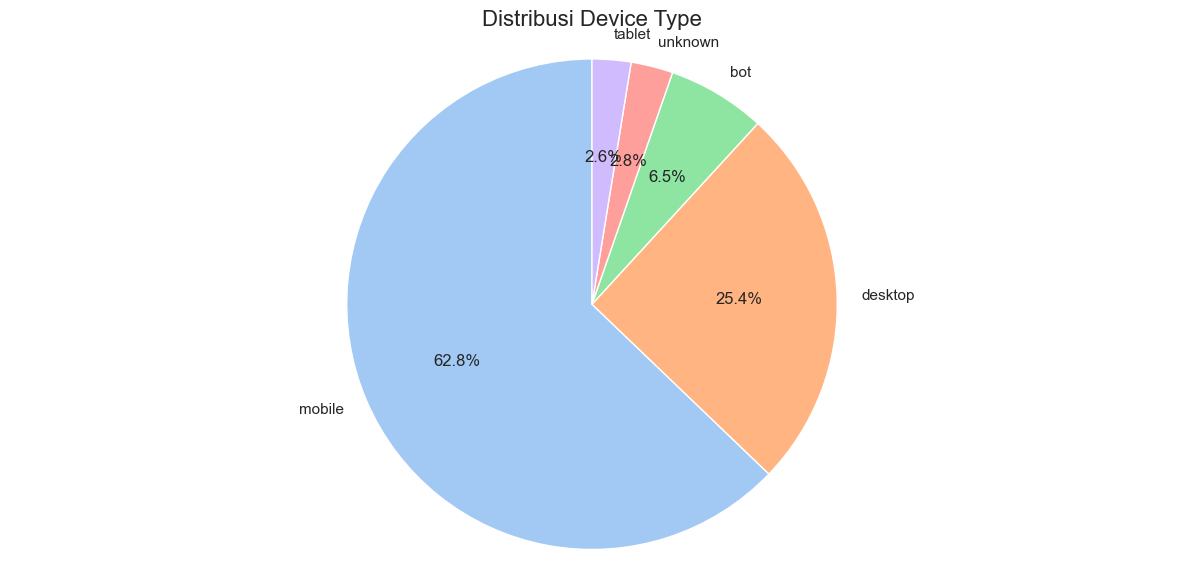

In [5]:
# Visualisasi Device Type dengan pie chart
plt.figure(figsize=(12, 6))
device_type_counts = df['Device Type'].value_counts(normalize=True) * 100
plt.pie(device_type_counts, labels=device_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(device_type_counts)))
plt.title('Distribusi Device Type', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


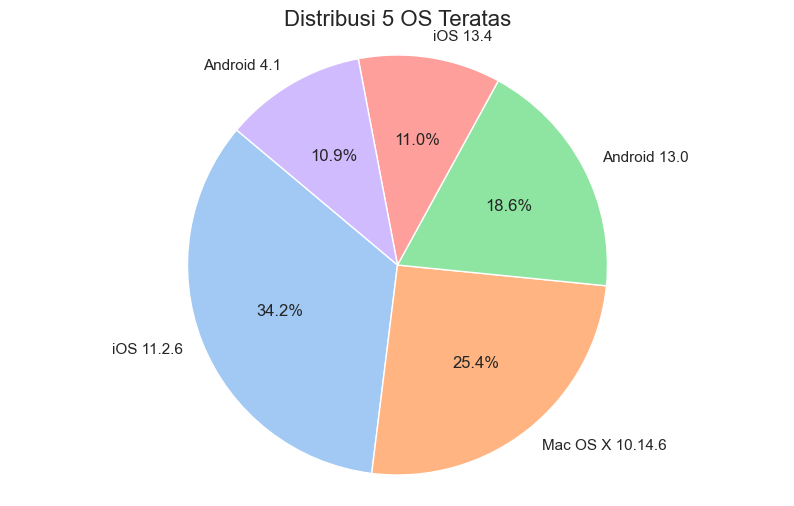

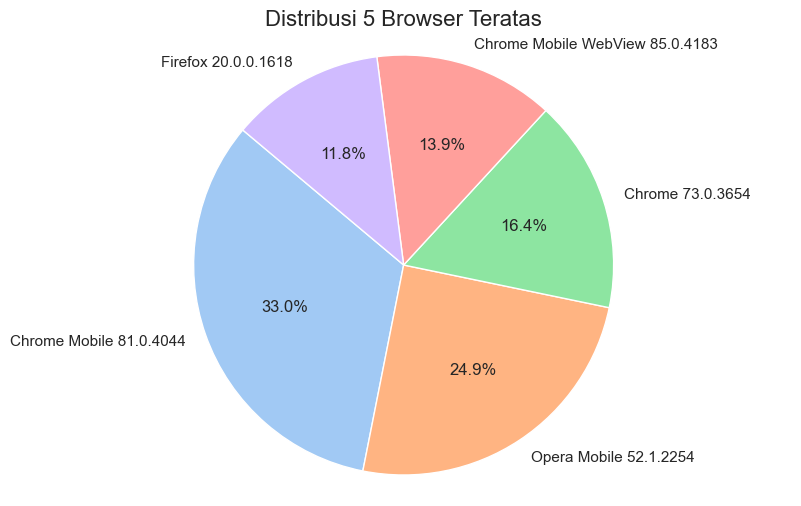

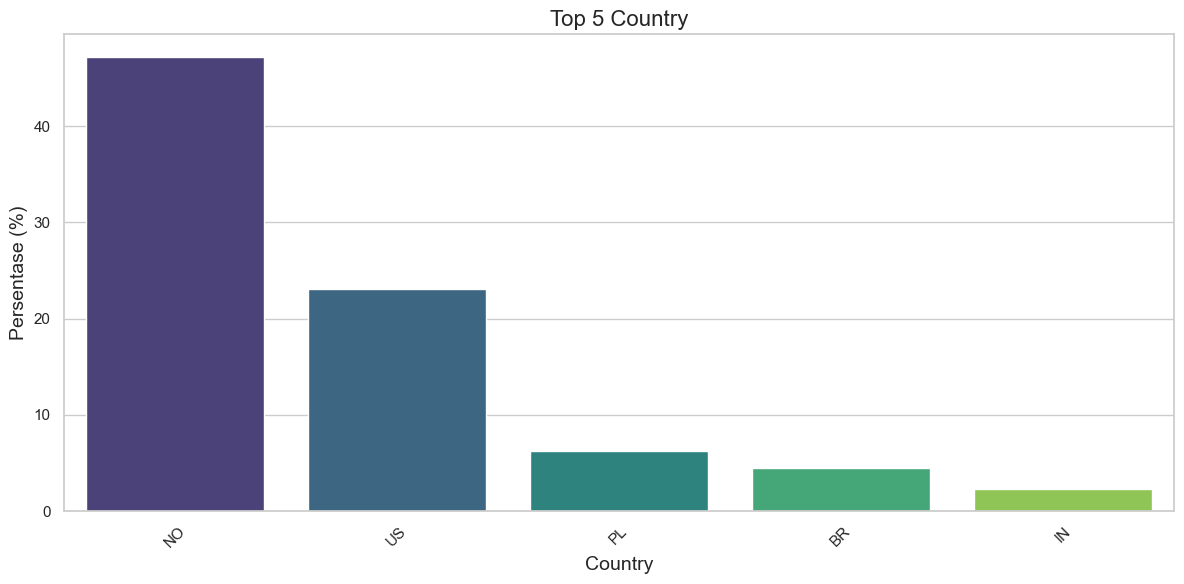

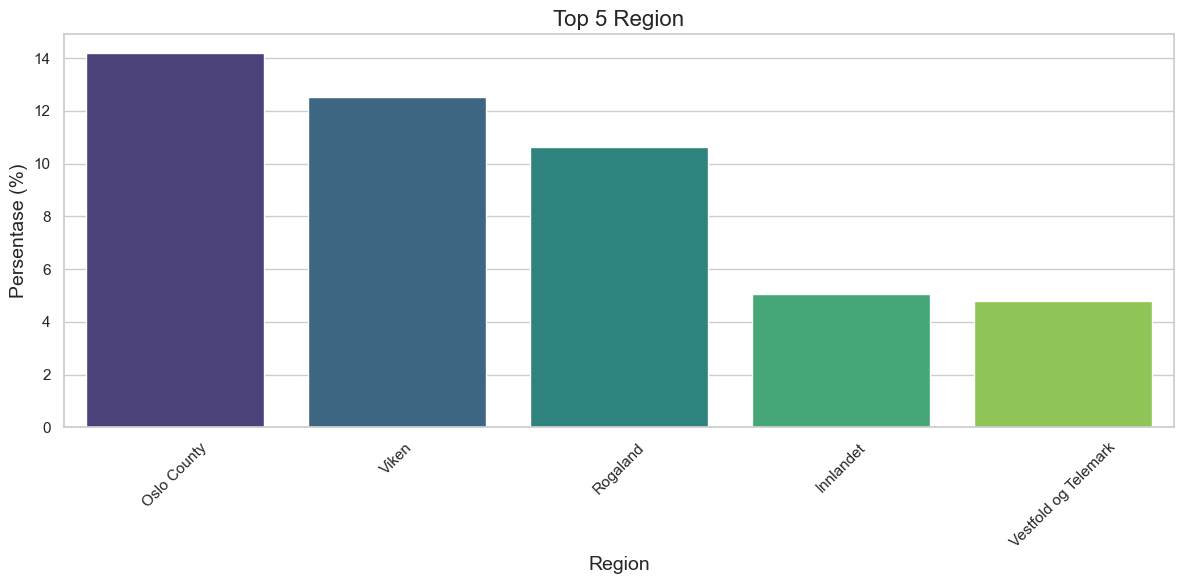

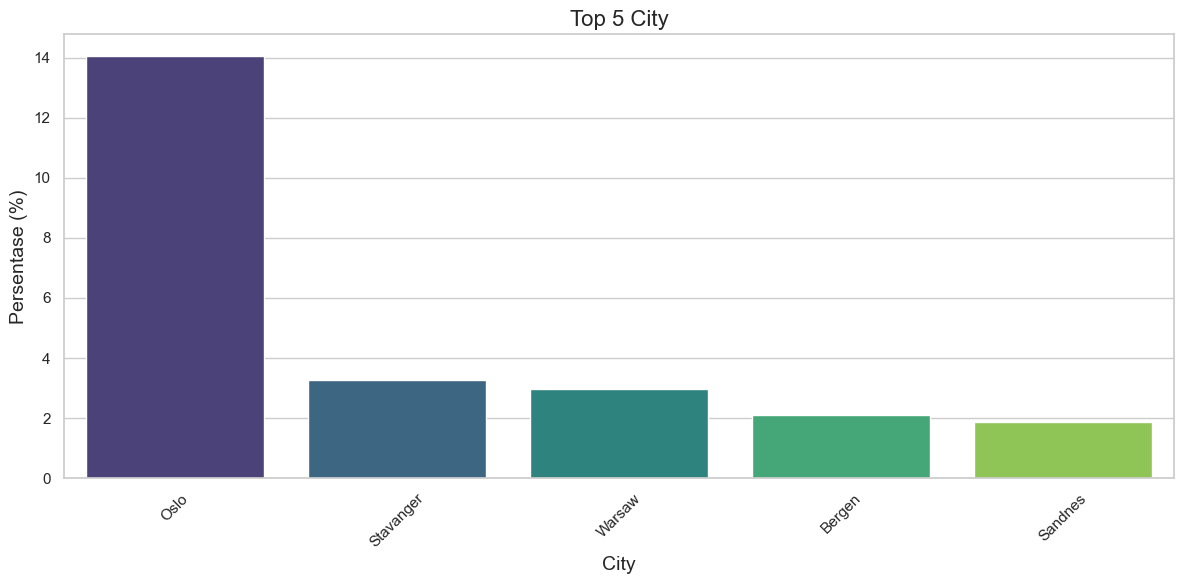

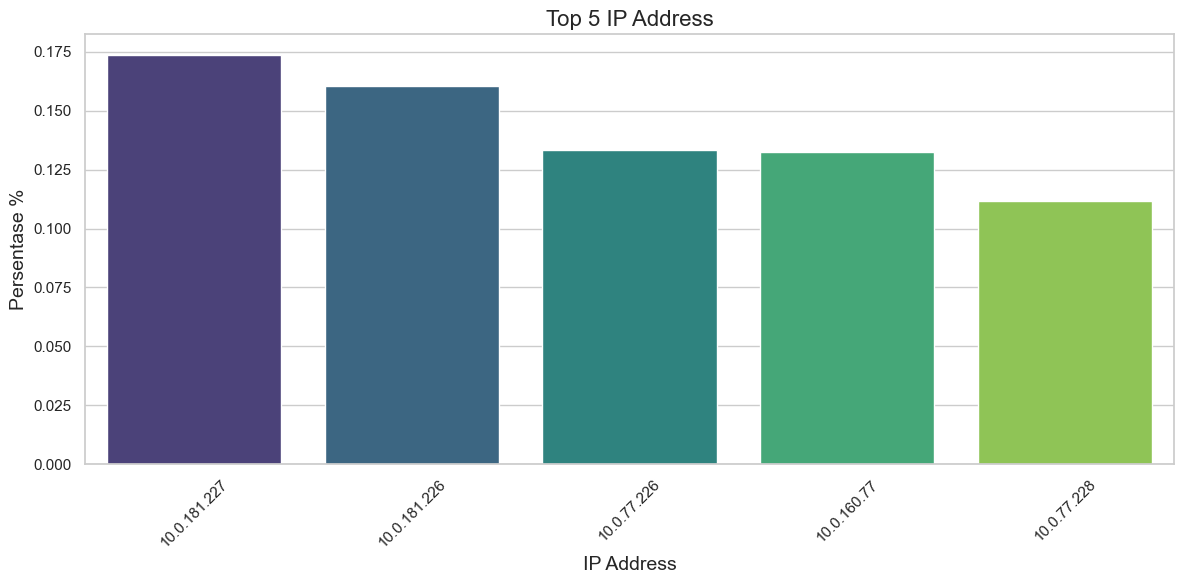

In [11]:

# Visualisasi Pie Chart untuk 5 OS Teratas
plt.figure(figsize=(10, 6))
top_os = df['OS Name and Version'].value_counts().nlargest(5)
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi 5 OS Teratas', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualisasi Pie Chart untuk 5 Browser Teratas
plt.figure(figsize=(10, 6))
top_browsers = df['Browser Name and Version'].value_counts().nlargest(5)
plt.pie(top_browsers, labels=top_browsers.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi 5 Browser Teratas', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualisasi Bar Chart untuk IP Address berdasarkan Country dalam Persentase
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 5 Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart untuk IP Address berdasarkan Region
plt.figure(figsize=(12, 6))
region_counts = df['Region'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Top 5 Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualisasi Bar Chart untuk IP Address berdasarkan City
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 5 City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualisasi Bar Chart untuk IP Address
plt.figure(figsize=(12, 6))
ip_counts = df['IP Address'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=ip_counts.index, y=ip_counts.values, palette='viridis')
plt.title('Top 5 IP Address', fontsize=16)
plt.xlabel('IP Address', fontsize=14)
plt.ylabel('Persentase %', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


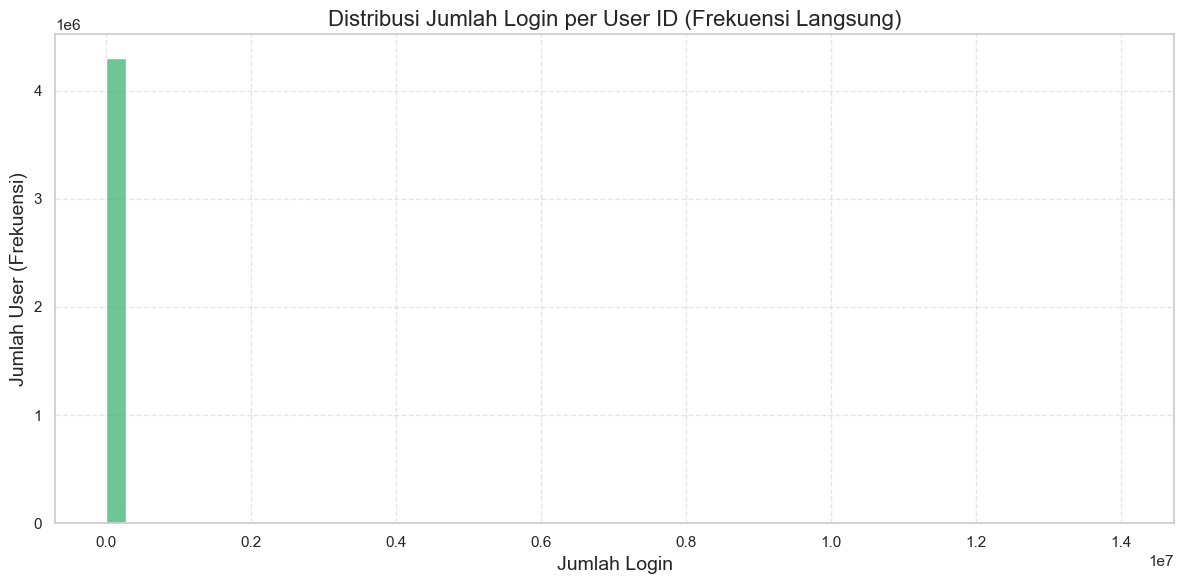

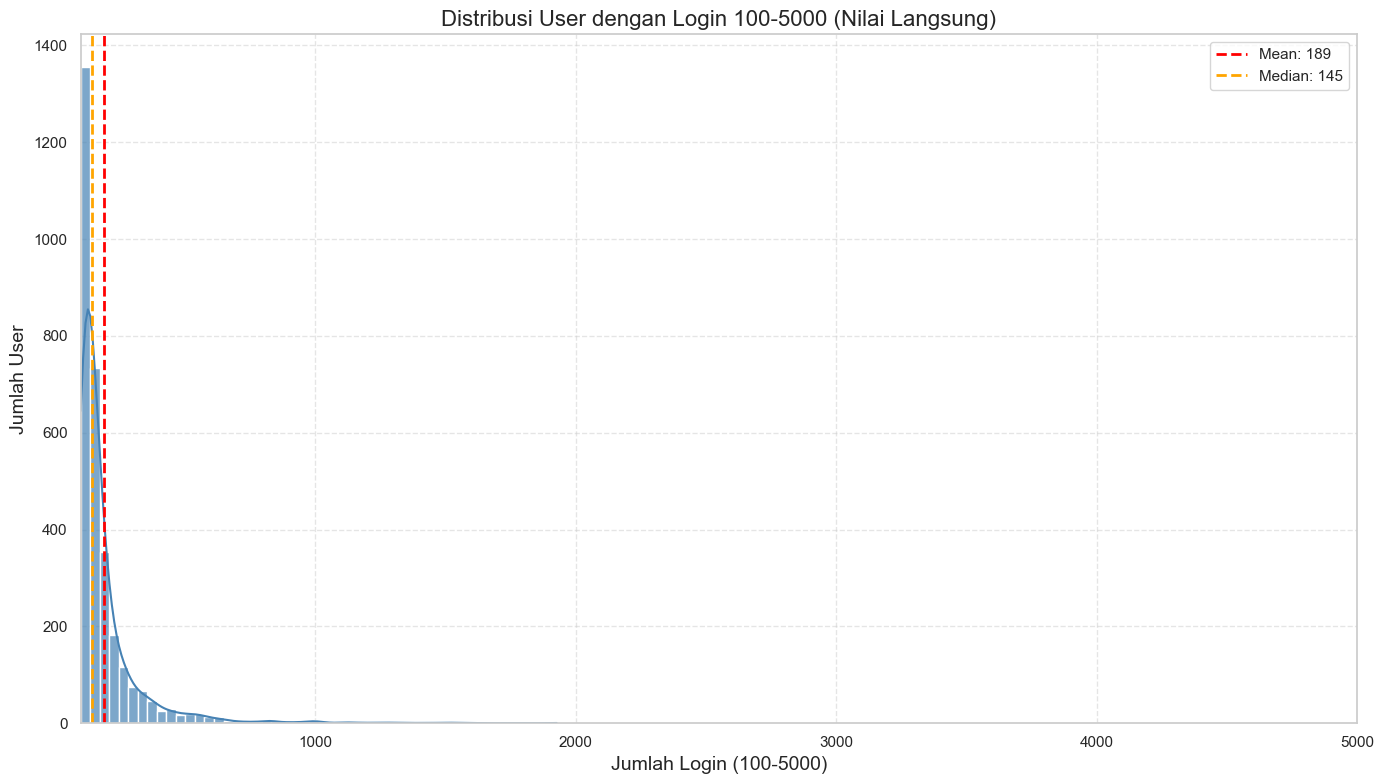

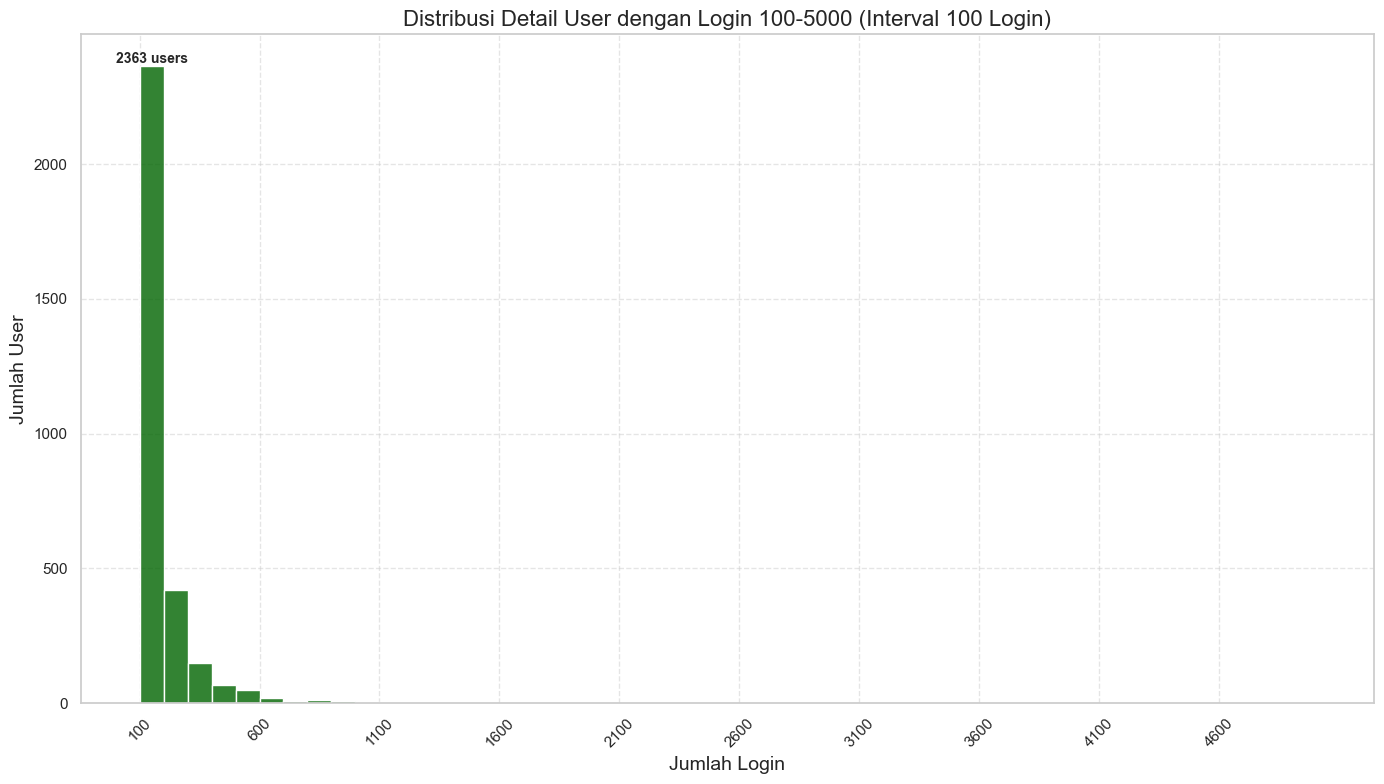

Statistik Distribusi Login per User (Semua Data):
Total users: 4,304,857
Mean login per user: 7.26
Median login per user: 2.00
Std deviation: 6760.16
Min login: 1
Max login: 14025899

Analisis Kategori Login:
Users dengan login < 100: 4,301,738
Users dengan login 100-5000: 3,116
Users dengan login > 5000: 3

Persentase dari Total Users:
Users dengan login < 100: 99.93%
Users dengan login 100-5000: 0.07%
Users dengan login > 5000: 0.00%


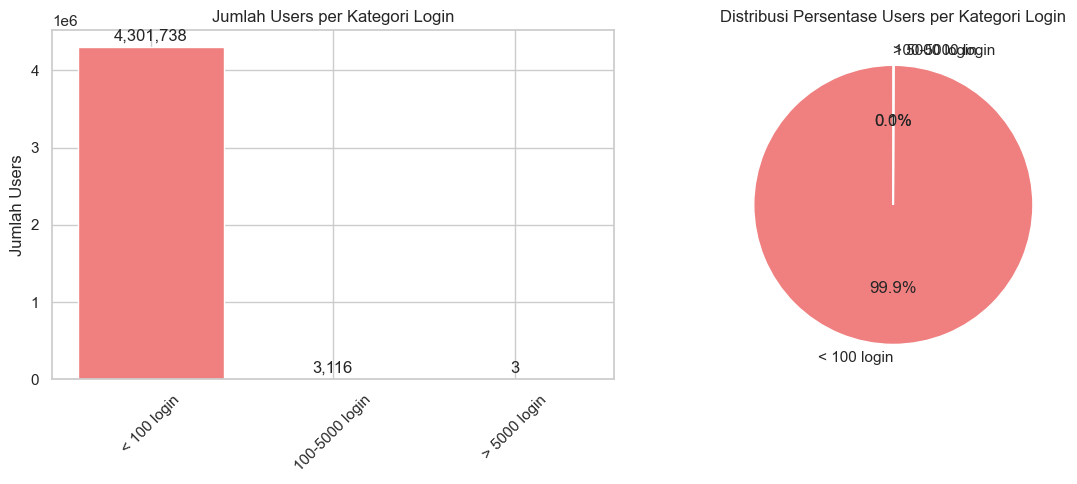


Detail Users dengan Login 100-5000:
Jumlah: 3,116 users
Min login: 100
Max login: 1927
Mean login: 189.36
Median login: 145.00
Std deviation: 145.47
Total records dari users ini: 590,061

Sub-kategori dalam rentang 100-5000:
Users dengan login 100-500: 3,000
Users dengan login 501-1000: 95
Users dengan login 1001-2000: 21
Users dengan login 2001-3000: 0
Users dengan login 3001-4000: 0
Users dengan login 4001-5000: 0


In [11]:
# Menghitung jumlah login per User ID
login_counts = df['User ID'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dengan frekuensi langsung (tanpa skala logaritmik)
plt.figure(figsize=(12, 6))
sns.histplot(login_counts, bins=50, stat='count', kde=False, color='mediumseagreen')

plt.title('Distribusi Jumlah Login per User ID (Frekuensi Langsung)', fontsize=16)
plt.xlabel('Jumlah Login', fontsize=14)
plt.ylabel('Jumlah User (Frekuensi)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Filter data untuk fokus pada rentang 100-5000 login
login_counts_filtered = login_counts[(login_counts >= 100) & (login_counts <= 5000)]

# Histogram khusus untuk rentang 100-5000 login dengan nilai langsung
plt.figure(figsize=(14, 8))
sns.histplot(login_counts_filtered, bins=50, stat='count', kde=True, color='steelblue', alpha=0.7)

plt.title('Distribusi User dengan Login 100-5000 (Nilai Langsung)', fontsize=16)
plt.xlabel('Jumlah Login (100-5000)', fontsize=14)
plt.ylabel('Jumlah User', fontsize=14)

# Set limit sumbu X untuk fokus pada rentang 100-5000
plt.xlim(100, 5000)

# Tambahkan informasi statistik untuk data yang difilter
if len(login_counts_filtered) > 0:
    mean_filtered = login_counts_filtered.mean()
    median_filtered = login_counts_filtered.median()
    plt.axvline(mean_filtered, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_filtered:.0f}')
    plt.axvline(median_filtered, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_filtered:.0f}')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histogram dengan bins yang lebih detail untuk rentang 100-5000
plt.figure(figsize=(14, 8))

# Buat bins custom untuk rentang 100-5000 dengan interval yang lebih kecil
bins_custom = np.arange(100, 5100, 100)  # Interval 100 login
sns.histplot(login_counts_filtered, bins=bins_custom, stat='count', kde=False, color='darkgreen', alpha=0.8)

plt.title('Distribusi Detail User dengan Login 100-5000 (Interval 100 Login)', fontsize=16)
plt.xlabel('Jumlah Login', fontsize=14)
plt.ylabel('Jumlah User', fontsize=14)

# Set ticks untuk sumbu X agar lebih mudah dibaca
plt.xticks(np.arange(100, 5100, 500), rotation=45)

# Tambahkan anotasi nilai pada bar tertinggi
ax = plt.gca()
patches = ax.patches
max_height = max([p.get_height() for p in patches])
for p in patches:
    if p.get_height() == max_height:
        plt.annotate(f'{int(p.get_height())} users', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Statistik deskriptif untuk login counts
print(f"Statistik Distribusi Login per User (Semua Data):")
print(f"Total users: {len(login_counts):,}")
print(f"Mean login per user: {login_counts.mean():.2f}")
print(f"Median login per user: {login_counts.median():.2f}")
print(f"Std deviation: {login_counts.std():.2f}")
print(f"Min login: {login_counts.min()}")
print(f"Max login: {login_counts.max()}")

# Analisis berdasarkan kategori login
print(f"\nAnalisis Kategori Login:")
print(f"Users dengan login < 100: {(login_counts < 100).sum():,}")
print(f"Users dengan login 100-5000: {((login_counts >= 100) & (login_counts <= 5000)).sum():,}")
print(f"Users dengan login > 5000: {(login_counts > 5000).sum():,}")

# Persentase dari total users
total_users = len(login_counts)
users_under_100 = (login_counts < 100).sum()
users_100_to_5000 = ((login_counts >= 100) & (login_counts <= 5000)).sum()
users_over_5000 = (login_counts > 5000).sum()

print(f"\nPersentase dari Total Users:")
print(f"Users dengan login < 100: {users_under_100/total_users*100:.2f}%")
print(f"Users dengan login 100-5000: {users_100_to_5000/total_users*100:.2f}%")
print(f"Users dengan login > 5000: {users_over_5000/total_users*100:.2f}%")

# Visualisasi distribusi kategori login
categories = ['< 100 login', '100-5000 login', '> 5000 login']
counts = [users_under_100, users_100_to_5000, users_over_5000]
percentages = [count/total_users*100 for count in counts]

plt.figure(figsize=(12, 5))

# Subplot 1: Bar chart jumlah
plt.subplot(1, 2, 1)
bars = plt.bar(categories, counts, color=['lightcoral', 'mediumseagreen', 'steelblue'])
plt.title('Jumlah Users per Kategori Login')
plt.ylabel('Jumlah Users')
plt.xticks(rotation=45)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
             f'{count:,}', ha='center', va='bottom')

# Subplot 2: Pie chart persentase
plt.subplot(1, 2, 2)
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, 
        colors=['lightcoral', 'mediumseagreen', 'steelblue'])
plt.title('Distribusi Persentase Users per Kategori Login')

plt.tight_layout()
plt.show()

# Detail statistik untuk users dengan login 100-5000
eligible_users = login_counts[(login_counts >= 100) & (login_counts <= 5000)]
if len(eligible_users) > 0:
    print(f"\nDetail Users dengan Login 100-5000:")
    print(f"Jumlah: {len(eligible_users):,} users")
    print(f"Min login: {eligible_users.min()}")
    print(f"Max login: {eligible_users.max()}")
    print(f"Mean login: {eligible_users.mean():.2f}")
    print(f"Median login: {eligible_users.median():.2f}")
    print(f"Std deviation: {eligible_users.std():.2f}")
    print(f"Total records dari users ini: {eligible_users.sum():,}")
    
    # Distribusi dalam sub-kategori untuk rentang 100-5000
    print(f"\nSub-kategori dalam rentang 100-5000:")
    print(f"Users dengan login 100-500: {((eligible_users >= 100) & (eligible_users <= 500)).sum():,}")
    print(f"Users dengan login 501-1000: {((eligible_users >= 501) & (eligible_users <= 1000)).sum():,}")
    print(f"Users dengan login 1001-2000: {((eligible_users >= 1001) & (eligible_users <= 2000)).sum():,}")
    print(f"Users dengan login 2001-3000: {((eligible_users >= 2001) & (eligible_users <= 3000)).sum():,}")
    print(f"Users dengan login 3001-4000: {((eligible_users >= 3001) & (eligible_users <= 4000)).sum():,}")
    print(f"Users dengan login 4001-5000: {((eligible_users >= 4001) & (eligible_users <= 5000)).sum():,}")

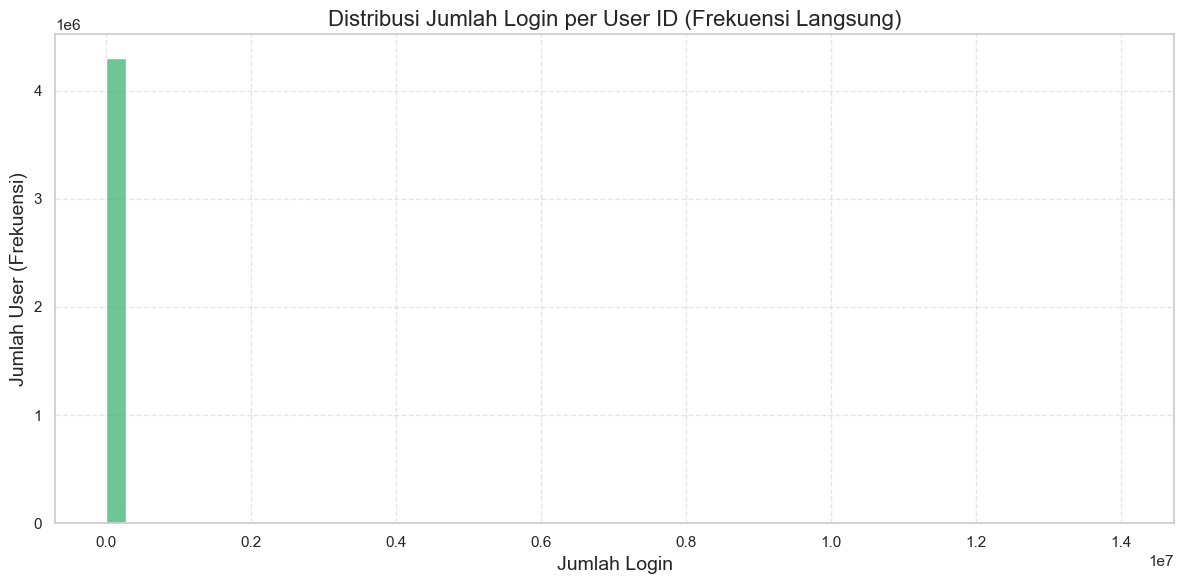

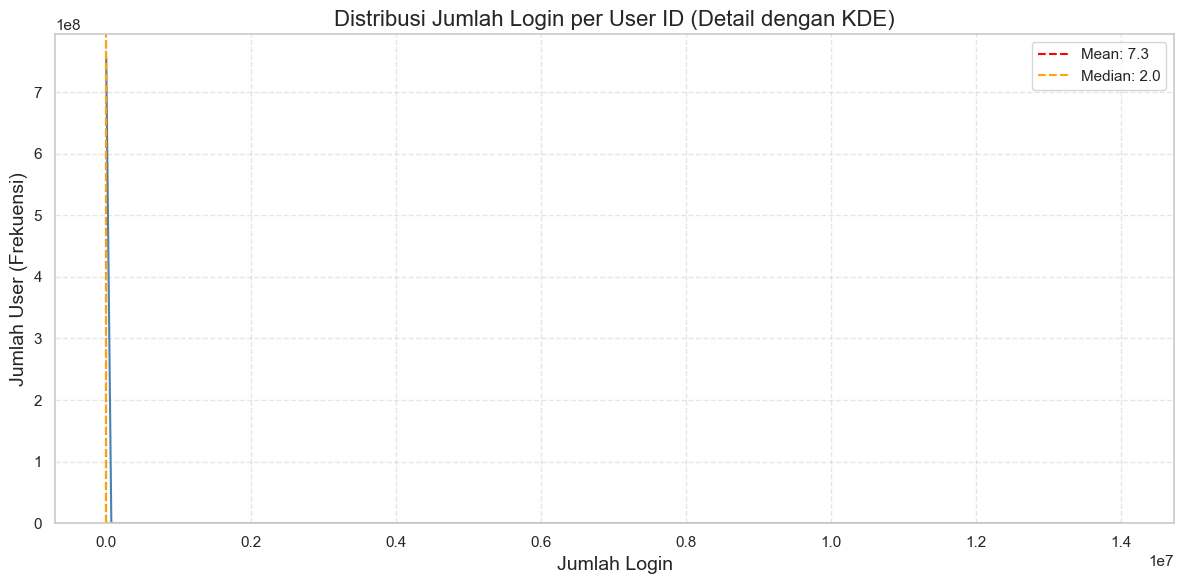

Statistik Distribusi Login per User:
Total users: 4,304,857
Mean login per user: 7.26
Median login per user: 2.00
Std deviation: 6760.16
Min login: 1
Max login: 14025899
Users dengan login > 1000: 24
Users dengan login > 5000: 3
Login Timestamp memiliki nilai unik yang sangat tinggi karena mencatat waktu spesifik setiap login. Untuk mendapatkan pemahaman yang lebih baik, data waktu dikonversi ke dalam jam dan hari. Visualisasi distribusi login per jam berikut menunjukkan kecenderungan waktu login pengguna.


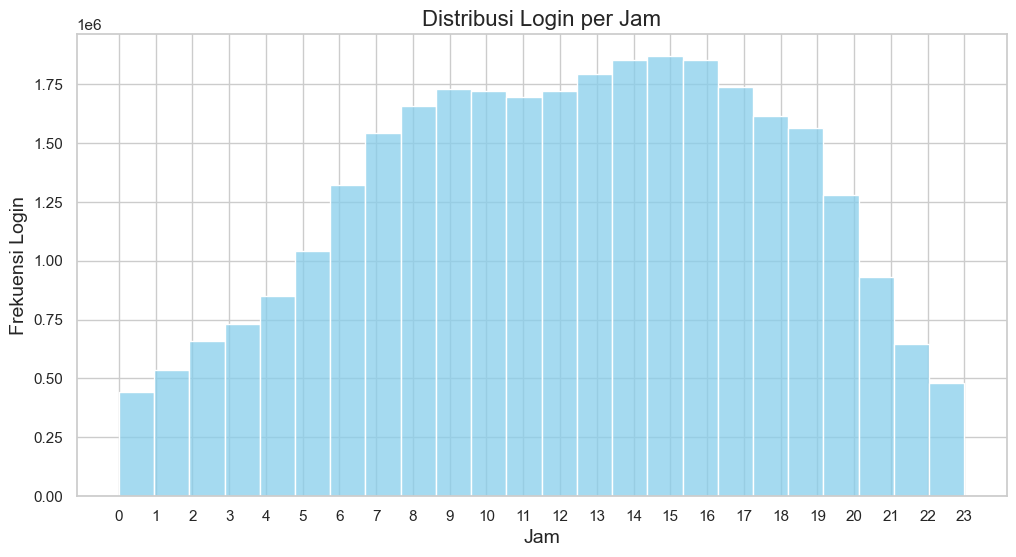

MemoryError: Unable to allocate 239. MiB for an array with shape (31269264,) and data type int64

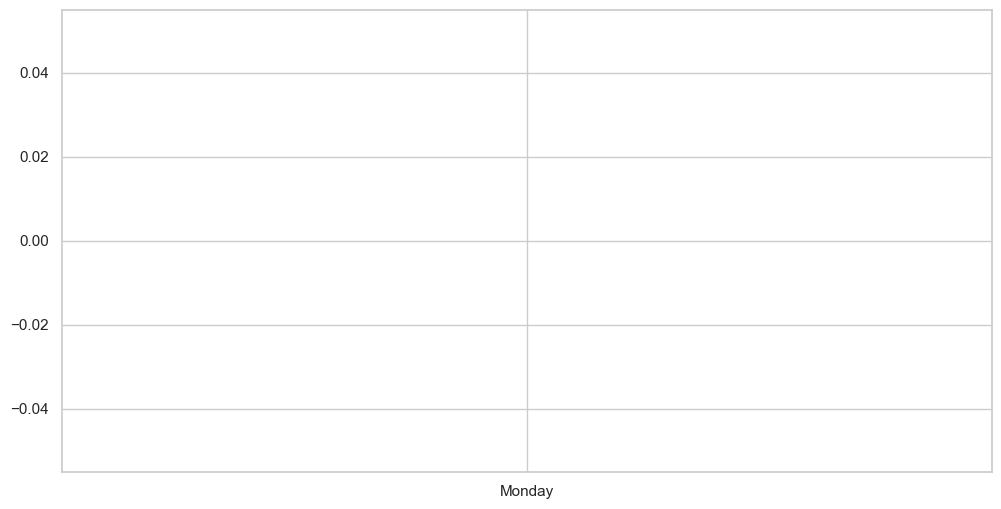

In [12]:
# Menghitung jumlah login per User ID
login_counts = df['User ID'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dengan frekuensi langsung (tanpa skala logaritmik)
plt.figure(figsize=(12, 6))
sns.histplot(login_counts, bins=50, stat='count', kde=False, color='mediumseagreen')

plt.title('Distribusi Jumlah Login per User ID (Frekuensi Langsung)', fontsize=16)
plt.xlabel('Jumlah Login', fontsize=14)
plt.ylabel('Jumlah User (Frekuensi)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Tambahan: Histogram dengan bins yang lebih detail untuk melihat pola
plt.figure(figsize=(12, 6))
sns.histplot(login_counts, bins=100, stat='count', kde=True, color='steelblue', alpha=0.7)

plt.title('Distribusi Jumlah Login per User ID (Detail dengan KDE)', fontsize=16)
plt.xlabel('Jumlah Login', fontsize=14)
plt.ylabel('Jumlah User (Frekuensi)', fontsize=14)

# Tambahkan informasi statistik
mean_logins = login_counts.mean()
median_logins = login_counts.median()
plt.axvline(mean_logins, color='red', linestyle='--', label=f'Mean: {mean_logins:.1f}')
plt.axvline(median_logins, color='orange', linestyle='--', label=f'Median: {median_logins:.1f}')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Statistik deskriptif untuk login counts
print(f"Statistik Distribusi Login per User:")
print(f"Total users: {len(login_counts):,}")
print(f"Mean login per user: {login_counts.mean():.2f}")
print(f"Median login per user: {login_counts.median():.2f}")
print(f"Std deviation: {login_counts.std():.2f}")
print(f"Min login: {login_counts.min()}")
print(f"Max login: {login_counts.max()}")
print(f"Users dengan login > 1000: {(login_counts > 1000).sum():,}")
print(f"Users dengan login > 5000: {(login_counts > 5000).sum():,}")

# Visualisasi Distribusi Login Timestamp

# Pengantar narasi
print("Login Timestamp memiliki nilai unik yang sangat tinggi karena mencatat waktu spesifik setiap login. Untuk mendapatkan pemahaman yang lebih baik, data waktu dikonversi ke dalam jam dan hari. Visualisasi distribusi login per jam berikut menunjukkan kecenderungan waktu login pengguna.")

# Konversi Login Timestamp ke datetime
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Ekstraksi jam dari Login Timestamp
df['Login Hour'] = df['Login Timestamp'].dt.hour

# Visualisasi Histogram login berdasarkan hour (jam 0–23)
plt.figure(figsize=(12, 6))
sns.histplot(df['Login Hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribusi Login per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(range(0, 24))
plt.show()

# Ekstraksi hari dari Login Timestamp
df['Login Day'] = df['Login Timestamp'].dt.day_name()

# Visualisasi Bar chart frekuensi login per hari (Senin–Minggu)
plt.figure(figsize=(12, 6))
sns.countplot(x='Login Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Frekuensi Login per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Visualisasi Distribusi ASN

# Pengantar narasi
print("Fitur ASN menunjukkan variasi penyedia layanan internet yang digunakan oleh pengguna. Sebagian besar login berasal dari ASN tertentu secara signifikan lebih banyak dibandingkan yang lain, sebagaimana ditunjukkan pada visualisasi berikut.")

# Bar chart 10 ASN dengan frekuensi login tertinggi
top_asn = df['ASN'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_asn.index, y=top_asn.values, palette='magma')
plt.title('Top 10 ASN dengan Frekuensi Login Tertinggi', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi Login', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Histogram distribusi ASN
plt.figure(figsize=(12, 6))
sns.histplot(df['ASN'], bins=50, kde=True, color='lightcoral')
plt.title('Distribusi ASN', fontsize=16)
plt.xlabel('ASN', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

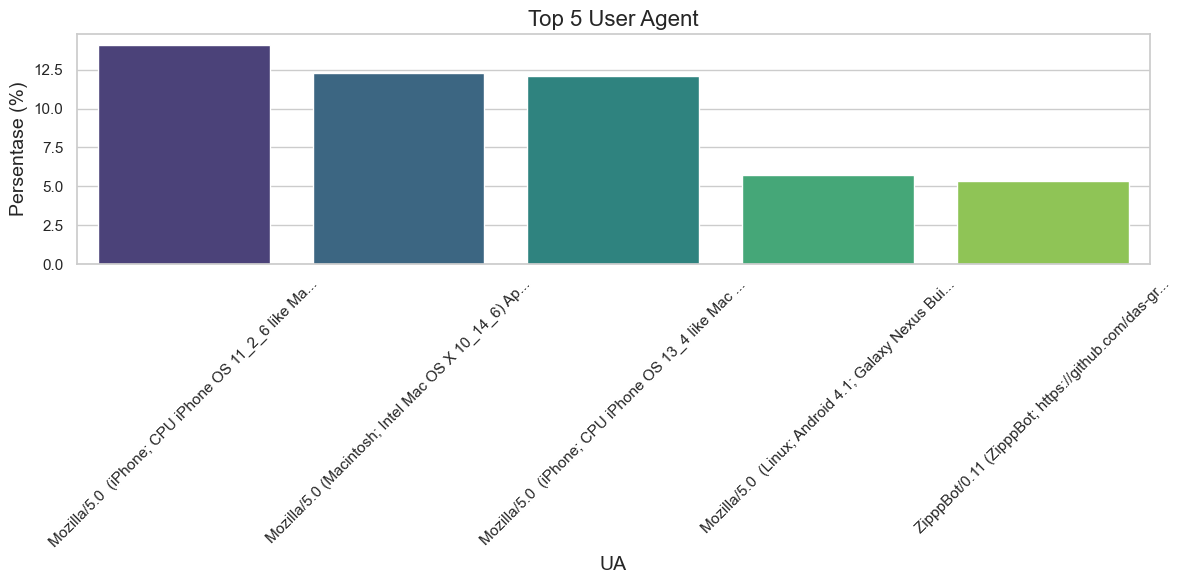

In [7]:
# Visualisasi Bar Chart untuk User Agent String dalam Persentase
plt.figure(figsize=(12, 6))

# Potong string UA panjang dan beri ellipsis
def truncate_ua(ua, max_len=50):
    return ua if len(ua) <= max_len else ua[:max_len] + '...'

# Memperpendek nama User Agent String
df['Short UA'] = df['User Agent String'].apply(truncate_ua)
ua_counts = df['Short UA'].value_counts(normalize=True).nlargest(5) * 100
sns.barplot(x=ua_counts.index, y=ua_counts.values, palette='viridis')
plt.title('Top 5 User Agent', fontsize=16)
plt.xlabel('UA', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


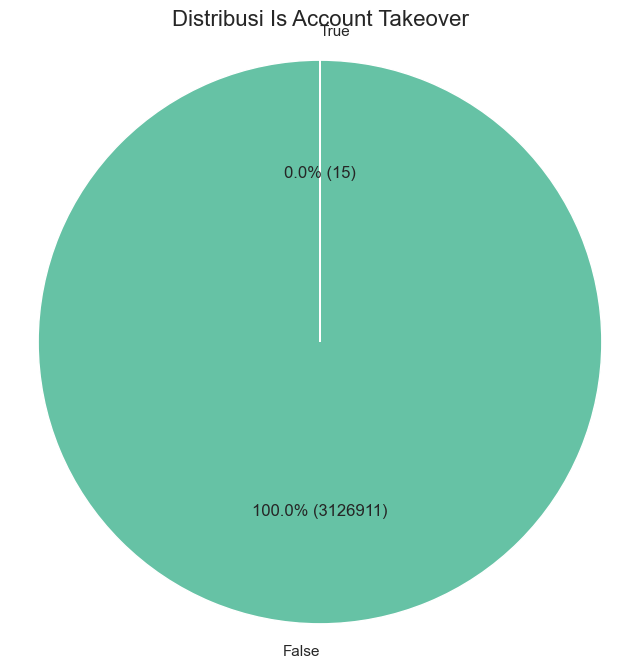

In [9]:
# Visualisasi ketidakseimbangan dengan pie chart untuk fitur 'Is Account Takeover'
takeover_counts = df['Is Account Takeover'].value_counts()
# Mengganti label 'True' dengan 'Benar' agar tidak tertutup
labels = ['True' if label == True else 'False' for label in takeover_counts.index]
# Menentukan posisi persentase di kanan dan kiri
def autopct_generator(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Membuat pie chart untuk menampilkan hasil
plt.figure(figsize=(8, 8))
plt.pie(takeover_counts, labels=labels, autopct=autopct_generator(takeover_counts), startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribusi Is Account Takeover', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
